<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_One/blob/master/DE_OPTIM_ANN_Insight_DIVERSIDADE_3x4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [0]:
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.7
crossp=0.5;

In [0]:

def AvaliaX(X):
  nrow,ncol=X.shape
  fitness = np.asarray([Fun(ind) for ind in X])
  best_idx = np.argmin(fitness)
  best = X[best_idx]
  fobj_best = fitness[best_idx]
  y=fitness
  BEST=best
  FOBEST=fobj_best
  XY= np.c_[X,y] #concatena x e y em 2 colunas            
  XYsorted = XY[XY[:,-1].argsort()] #Ordena a partir da last col(Y) for all row
  x=XYsorted[:,0:ncol]
  XY=XYsorted
  BEST_XY =np.append(BEST,FOBEST)
  return XY,BEST_XY,BEST,FOBEST

In [4]:
!git clone https://github.com/ucfilho/optim_raianars_Insight #clonar do Github
%cd optim_raianars_Insight

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight


In [0]:
import Go2Ann

In [6]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/optim_raianars_Insight/ANN_read_matrix


In [0]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [0]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [0]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [12]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight


In [0]:
############################### DADOS DE ENTRADA 
RUNS=1 #NÚMERO DE RODADAS
#mut=0.8
#crossp=0.7
  ############################### Função
import Function


'''
Fun=Function.Rosenbrock
dim=5
MAX=np.repeat(10,dim)
MIN=np.repeat(-10,dim)

  #Global optimum: f(xi)= 0
'''
'''
dim=10
Fun=Function.Sphere
MAX=np.repeat(5.12,dim)
MIN=np.repeat(-5.12,dim)
  # f(x)=0 x=(0,0) [-5.12,5.12]
'''
'''
dim=10
Fun=Function.Schwefel
MAX=np.repeat(500,dim)
MIN=np.repeat(-500,dim)
  #Global optimum: f(xi)= 0 for xi = 420.968746 for i=1,...,n  ;  xi in [-500,500]  
'''
#'''
dim=30
Fun=Function.Rastrigin
MAX=np.repeat(5.12,dim)
MIN=np.repeat(-5.12,dim)
  # f(x)=0 x=(0,0) [-5.12,5.12]
#'''
'''
dim=30
Fun=Function.Sum_of_different_powers
MAX=np.repeat(1,dim)
MIN=np.repeat(-1,dim)
  # f(x)=0 x=(0,0)
'''
'''  
dim=30
Fun=Function.Ackley
MAX=np.repeat(32,dim)
MIN=np.repeat(-32,dim)
 # f(x)=0 x=(0,0) [-32, 32]
'''
'''  
dim=30
Fun=Function.Michalewicz
MAX=np.repeat(np.pi,dim)
MIN=np.repeat(0,dim)
 #fx=-9.66015 p/ d=10 [0,pi]
'''
'''  
dim=30
Fun=Function.
MAX=np.repeat(1,dim)
MIN=np.repeat(-1,dim)
'''

PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [0]:
def GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL):
  global fields, Go2Ann, Fc
  global syn0_F,syn1_F,X_max_F,X_min_F
  global syn0_CR,syn1_CR,X_max_CR,X_min_CR
  nrow,ncol=X.shape
  FOBESTm=1e99
  Fo=MAT_INDo[0,6]    # VALOR Fo   
  CRo=MAT_INDo[0,7]   # VALOR CRo
  QUANT=17 # quantos indices esta fazendo
  MAT_IND=np.zeros((1,QUANT))

  REF=0.1 # REFERENCIA DE DIFERENCAS ENTRE OS ELEMENTOS
  
  XY,BEST_XY,BEST,FOBEST=AvaliaX(X)
  soma=0
  for j in range(ncol):
    for i in range(nrow):
        Xj=np.mean(X[:,j])
        soma=soma+(X[i,j]-Xj)**2
  DI=(soma/nrow)**0.5
  DIr=DI/DIo
  MAT_IND[0,0]=DI #dispersao
  MAT_IND[0,1]=DIr # dispersao relativa
  MAT_IND[0,2]=SOMA/TOTAL # fracao relativa

  V1=FOBESTo
  V2=FOBEST
  A=2*V2
  if(V1 > A):
    MAT_IND[0,3]=2 # o valor de fobj torna pelo menos duas vezes melhor
  elif (V2==V1):
    MAT_IND[0,3]=0 # o valor de fobj nao altera
  else:
    MAT_IND[0,3]=1 # o valor de fobj melhora mas menos que duas vezes
  
  # MAT_IND[0,4]  # VELOC X
  DELTA=np.amax(abs(BEST-BESTo))
  if( DELTA >REF):
    MAT_IND[0,4]=2 # difere  for i in range(1,len(PARTIC)):
  elif ( DELTA == 0):
    MAT_IND[0,4]=0 # sem diferenca entre as posicoes do xbest entre duas buscas
  else:
    MAT_IND[0,4]=1 # diferenca entre as posicoes  do xbest menor que ref
  
  MAT_IND[0,5]=nrow  # VALOR NP
  nrow,ncol=XY.shape
  MAT_IND[0,8]=XY[0,(ncol-1)] # VALOR fmin
  MAT_IND[0,9]=XY[(nrow-1),(ncol-1)] # VALOR fmax
  # MAT_IND[0,10] # Valor AD_fmin 
  if abs(MAT_IND[0,8]/MAT_IND[0,8])>1:
    MAT_IND[0,10]=1/abs(MAT_IND[0,8])
  else:
    MAT_IND[0,10]=MAT_IND[0,8]/MAT_IND[0,8]
  # MAT_IND[0,11] # Valor AD_fmax
  if abs(MAT_IND[0,9]/MAT_IND[0,9])>1: # tem que pegar primeira
    MAT_IND[0,11]=1/abs(MAT_IND[0,9]) # tem que pegar primeira
  else:
    MAT_IND[0,11]=MAT_IND[0,9]/MAT_IND[0,9] # tem que pegar do anterior

  # MAT_IND[0,12] # DELTA Fobj
  MAT_IND[0,12]=MAT_IND[0,3]-MAT_IND[0,3]  # tem que pegar do anterior
  

  # MAT_IND[0,13] # DELTA Vx
  MAT_IND[0,13]=MAT_IND[0,4]-MAT_IND[0,4]  # tem que pegar do anterior

  # MAT_IND[0,14] # r_fitness
  Fmin=0.05
  if (MAT_IND[0,8]==0):
    MAT_IND[0,14]=Fmin
  elif (MAT_IND[0,9]==0):
    MAT_IND[0,14]=Fmin
  else:
    if abs(MAT_IND[0,9]/MAT_IND[0,8])<1:
      MAT_IND[0,14]=1-abs(MAT_IND[0,9]/MAT_IND[0,8])
    else:
      MAT_IND[0,14]=1-abs(MAT_IND[0,8]/MAT_IND[0,9])

  MAT_IND[0,6]=Fo
  MAT_IND[0,7]=CRo

  # comecando a rede!!!
  #['DI RELATIVO', 'FRAC Its', 'Fo', 'CRo'] VALORES A USAR
  #MAT_IND[0,1]=DIr # dispersao relativa
  #MAT_IND[0,2]=SOMA/TOTAL # fracao relativa
  #MAT_IND[0,6]=Fo
  #MAT_IND[0,7]=CRo
  
  x_train=MAT_INDo[0,[1,2,6,7]]
  x_train=pd.DataFrame(x_train).T

  nrow,ncol=ANN_F.shape
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  #print(x_train);
  #print(y_calc);
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)

  Fd=DIr
  CRa=np.copy(CRo)
  Fa=np.copy(Fo)

  if(y_cod_F>0):
    Fo=Fo*(1+Fd) #Fo=Fo+Fc
    Fo=(3*Fo+Fa)/4 # para suavizar
    if(Fo<Fa):
      Fo=Fa+0.05
    if(Fo<Fa): # conferir a necessidade de melhorar 
      Fo=Fa+0.05
  else:
    Fo=Fo*(1-Fd) #Fo=Fo-Fc
  
  if(y_cod_CR>0):
    CRo=CRo*(1+Fd) #CRo=CRo+Fc
    CRo=(3*CRo+CRa)/4 # para suavizar
    if(CRo<CRa):  # conferir a necessidade de melhorar 
      CRo=CRa+0.05
  else:
    CRo=CRo*(1-Fd);#CRo=CRo-Fc
  
  if(CRo<Fc):
    CRo=(CRo+CRa)/2 # conferir a necessidade de melhorar
  if(CRo> 1):
    CRo=1

  if(Fo<Fc):
    Fo=(Fa+Fo)/2  # conferir a necessidade de melhorar
  if(Fo> 1):
    Fo=1
  
  CRo=(2*CRo+CRa)/3 # para suavizar
  
  MAT_IND[0,15]=Fo # valor de F que sai da rede
  MAT_IND[0,16]=CRo # valor de CR que sai da rede
  #print(confusion_matrix(y_quali,y_obs_test))
  
  return MAT_IND



In [0]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']




In [0]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]


for i in range(RUNS):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS


  DIo=1e99
  
  CRo=crossp;Fo=mut;
  #Xo=np.copy(X)
  XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X)
  nrow,ncol=X.shape

  QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
  MAT_INDo[0,5]=nrow  # VALOR NP
  MAT_INDo[0,6]=Fo    # VALOR Fo   
  MAT_INDo[0,7]=CRo   # VALOR CRo
  
  MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL)
  
  DIo=np.copy(MAT_INDo[0,0])
  pd.set_option('display.max_columns', 30)  
  MAT_INDo[0,15]=Fo    # VALOR Fo   
  MAT_INDo[0,16]=CRo   # VALOR CRo
  MAT=[]
  for loop in range(ITE):
    X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,
                                                      its,Fun,X,SOMA,TOTAL)
    
    MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL)
    
    BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
    MAT.append(MAT_IND.ravel())
    
    MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
    MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
    
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
df  = pd.DataFrame(MAT, columns=NOMES)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)


In [17]:
print(df)

    DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0          16.313747     1.006180      0.01         1.0      2.0  300.0   
1          16.304587     1.005615      0.02         0.0      0.0  300.0   
2          16.317152     1.006390      0.03         0.0      0.0  300.0   
3          16.254004     1.002495      0.04         0.0      0.0  300.0   
4          16.255091     1.002562      0.05         0.0      0.0  300.0   
..               ...          ...       ...         ...      ...    ...   
95         12.741783     0.785872      0.96         0.0      0.0  300.0   
96         12.712122     0.784043      0.97         0.0      0.0  300.0   
97         12.657794     0.780692      0.98         0.0      0.0  300.0   
98         12.614054     0.777994      0.99         0.0      0.0  300.0   
99         12.606605     0.777535      1.00         0.0      0.0  300.0   

          Fo       CRo        fmin        fmax  AD_fmin  AD_fmax  DELTA FOBJ  \
0   0.700000  0.500

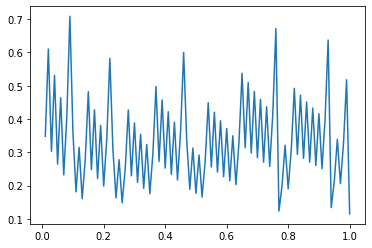

In [18]:
plt.plot(df['FRAC Its'],df['F'])

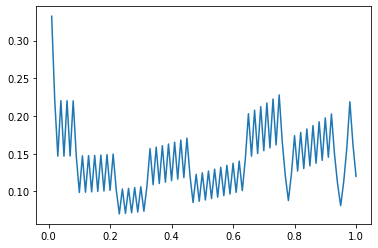

In [19]:
plt.plot(df['FRAC Its'],df['CR'])